In [1]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import glob

In [2]:
#setting path to the env variable
folder = os.environ['CAPSTONE_DATA']
folder

'C:\\max\\Google Drive Max\\Max Shared\\Master Data Science\\2020-05 Capstone A\\msds_capstone\\data\\'

# EDA

## Loading

In [3]:
dataRaw= pd.read_pickle(os.path.join(folder,'tidy_data/Transactions_v3/Transactions.pkl'))
print(dataRaw.shape)
dataRaw.head(1)

(53552, 45)


,Month,Chain Master ID,Chain Master,Customer ID,Customer,Beverage Type,Vendor,Vendor ID,Brand,Label,...,Qty Per Case,Alcohol Proof,STD. Cases,Dollar Sales,9L Cases,Dollar Sales per Case,Dollar Sales per 9L Case,Size Liters,Bottles,Transactions
0,2015-11-01,2577,JUANITOS,300001611,JUANITOS LIQUOR STORE INC,SPIRITS,SAZERAC/GEMINI SPIRITS & WINE,854,TAAKA,TAAKA VODKA 80,...,12,80.0,350.0,20412.0,465.5,58.32,43.849624,0.1,4200.0,1


### Filter by Category in Sup Premium Whiskey, Premium Vodka

In [4]:
data=dataRaw #[dataRaw['Category (CatMan)'].isin(['SUP PREM WHISKEY','ECONOMY VODKA'])]
print(data.shape)
plt.style.use('default')
             

(53552, 45)


In [5]:
dataT = data.groupby(['Chain Master','Category (CatMan)','Product'])['Month'].nunique().sort_values(ascending=False)
t=dataT.groupby(level=[0,1],group_keys=False)
t2=t.apply(lambda x: x.sort_values(ascending=False).head(10)).reset_index()
t2['Product'].unique()

# all chains in elpase, for category ['SUP PREM WHISKEY','ECONOMY VODKA'], all products, by week.



array(['TAAKA VODKA 80  1L', 'JACK DANIELS TENN HNY WHSKY  750M',
       'JACK DANIELS BLK WHSKY  750M', 'JACK DANIELS BLK WHSKY  1L',
       'MCCORMICK CHERRY VODKA 60  1L', 'MCCORMICK APPLE VODKA 60  1L',
       'MCCORMICK WATERMELON VODKA 60  1L',
       'MCCORMICK RASPBERRY VODKA 60  1L', 'MCCORMICK PEACH VODKA 60  1L',
       'TAAKA VODKA 80 PET 1.75L', 'MCCORMICK WHIPPED CREAM VODKA 60 1L',
       'MCCORMICK CITRUS VODKA 60  1L', 'MCCORMICK APPLE VODKA 60  1.75L',
       'GENTLEMAN JACK WHSKY OL 750M',
       'JACK DANIELS BLK WHSKY FLSK PET 375M',
       'JACK DANIELS BLK WHSKY  1.75L', 'WILD TURKEY 101  750M',
       'JACK DANIELS TENN HNY WHSKY  1L',
       'GENTLEMAN JACK WHSKY 12PK 375M', 'WILD TURKEY 101 12PK 375M',
       'DOBRA VODKA  1.75L', 'DOBRA VODKA  1L',
       'REBECCA CREEK WHSKY 6PK 750M', 'JACK DANIELS BLK WHSKY SQ 375M',
       'BUFFALO TRACE BBN BRL  750M', 'MCCORMICK ORNG VODKA 60  1L',
       'TAAKA RED BERRY VODKA  1L', 'JACK DANIELS TENN FIRE LIQ  1L',
  

# Qualitative Distribution

## Record count

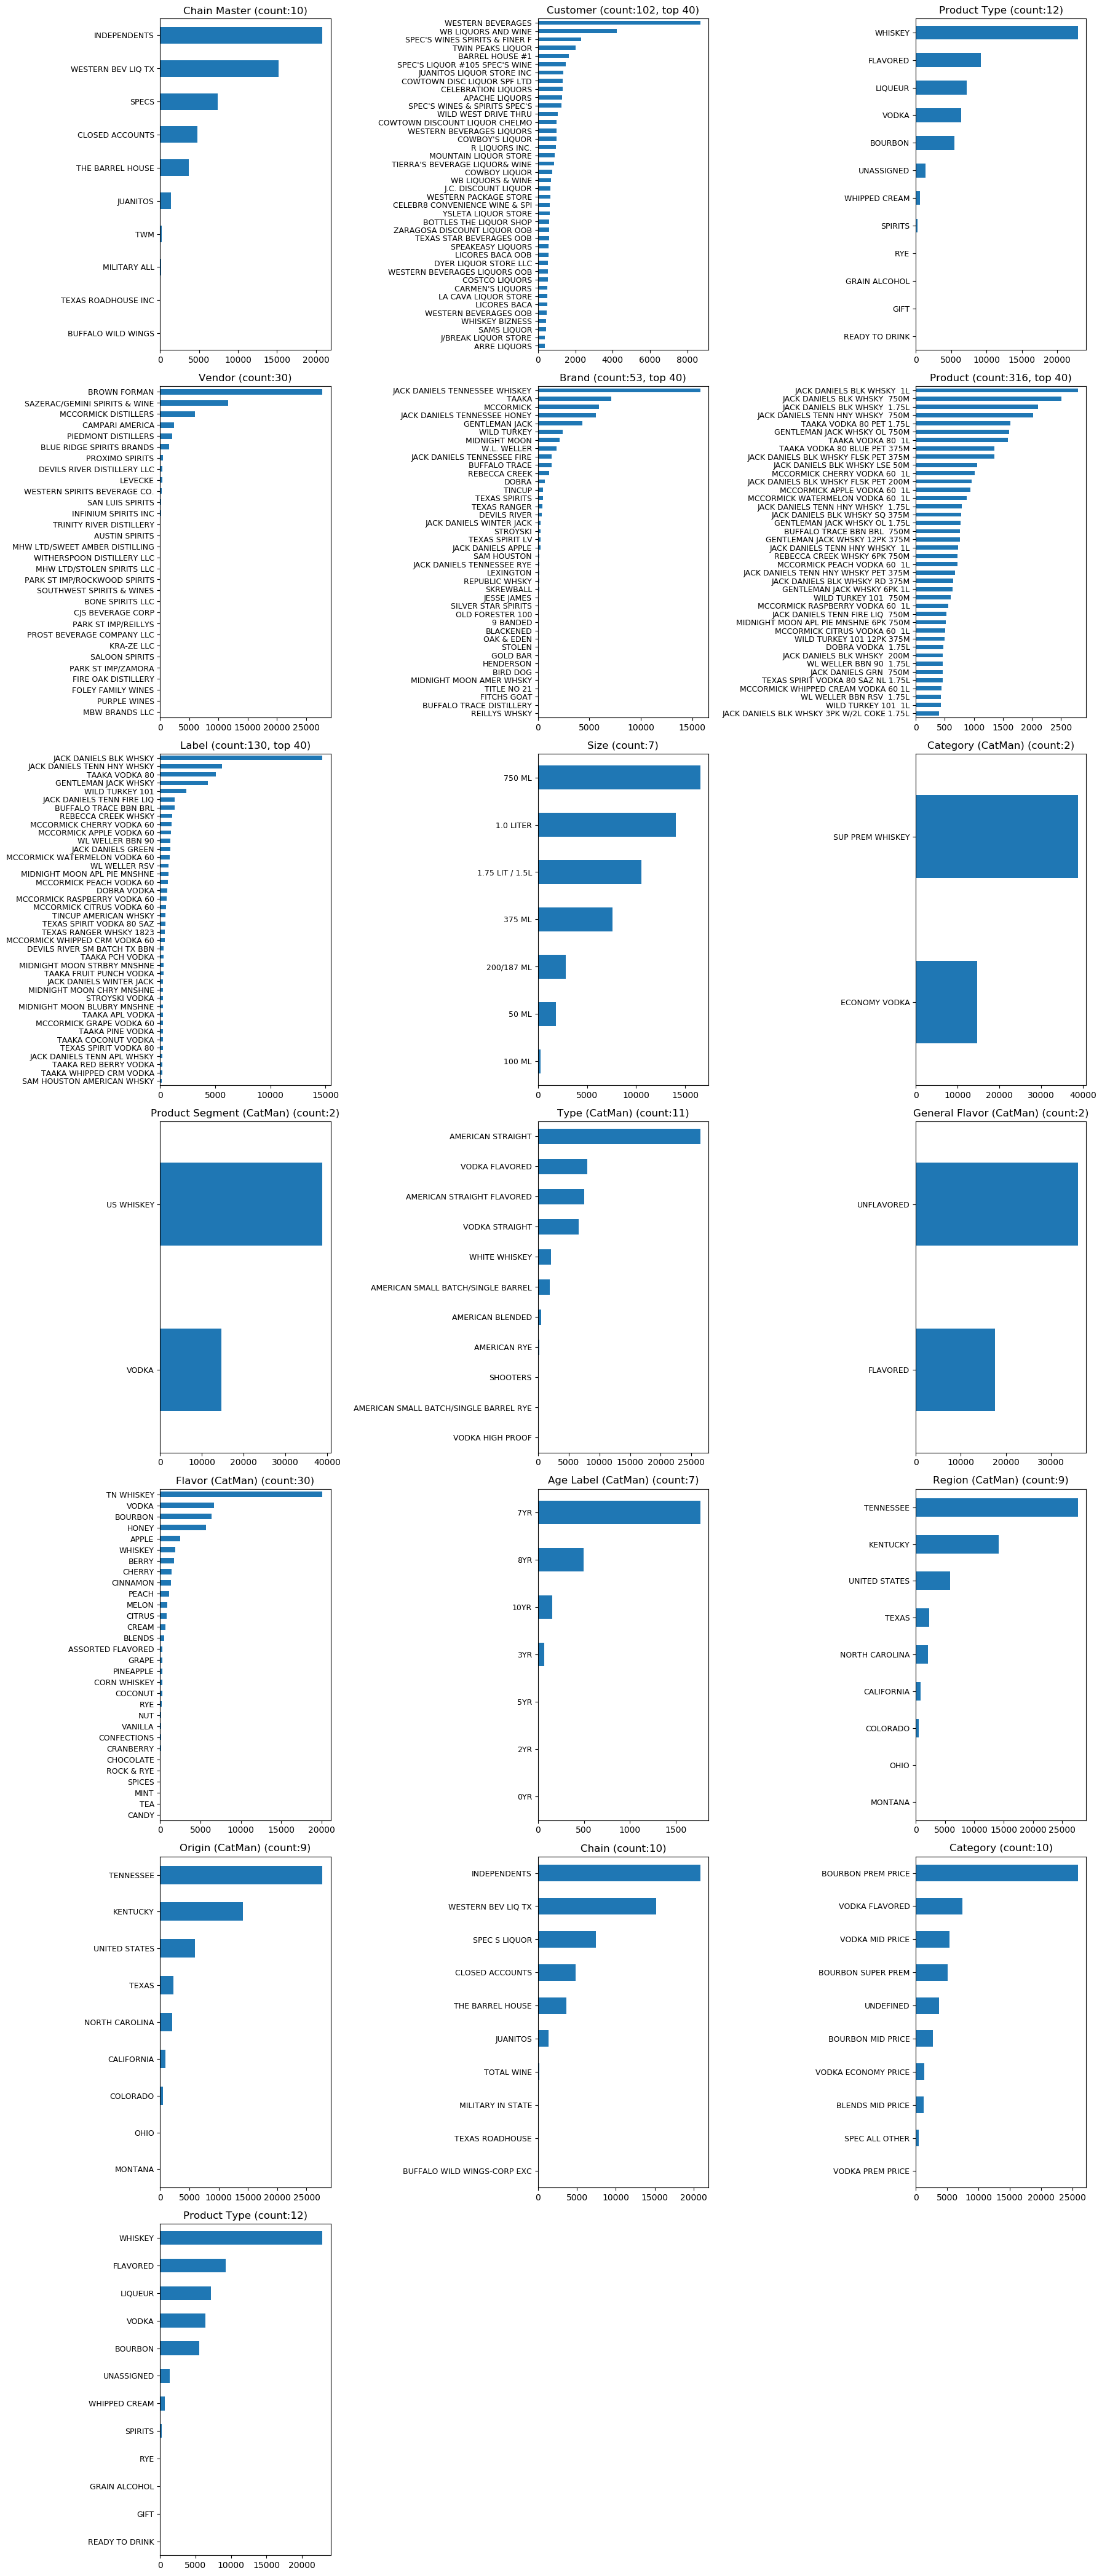

In [6]:
#cols = data.select_dtypes('object').columns
cols = ['Chain Master','Customer','Product Type','Vendor','Brand','Product','Label','Size','Category (CatMan)'
        ,'Product Segment (CatMan)','Type (CatMan)','General Flavor (CatMan)','Flavor (CatMan)','Age Label (CatMan)'
        ,'Region (CatMan)','Origin (CatMan)'
        ,'Chain','Category','Product Type'

]

rows = math.ceil(len(cols)/3)
plt.figure(figsize=(18,6*rows))
maxOut = 40
for i,c in enumerate(cols):
    plt.subplot(rows,3,i+1)
    v =  data[c].value_counts().sort_values(ascending=True)
    plt.title(c + ' (count:' + str(v.shape[0]) + (', top ' + str(maxOut)  if v.shape[0]>maxOut else '' ) + ')')
    plt.tick_params(axis='y',labelsize=9)
    v.tail(maxOut).plot(kind='barh')
plt.tight_layout()

## Sales 9L Cases

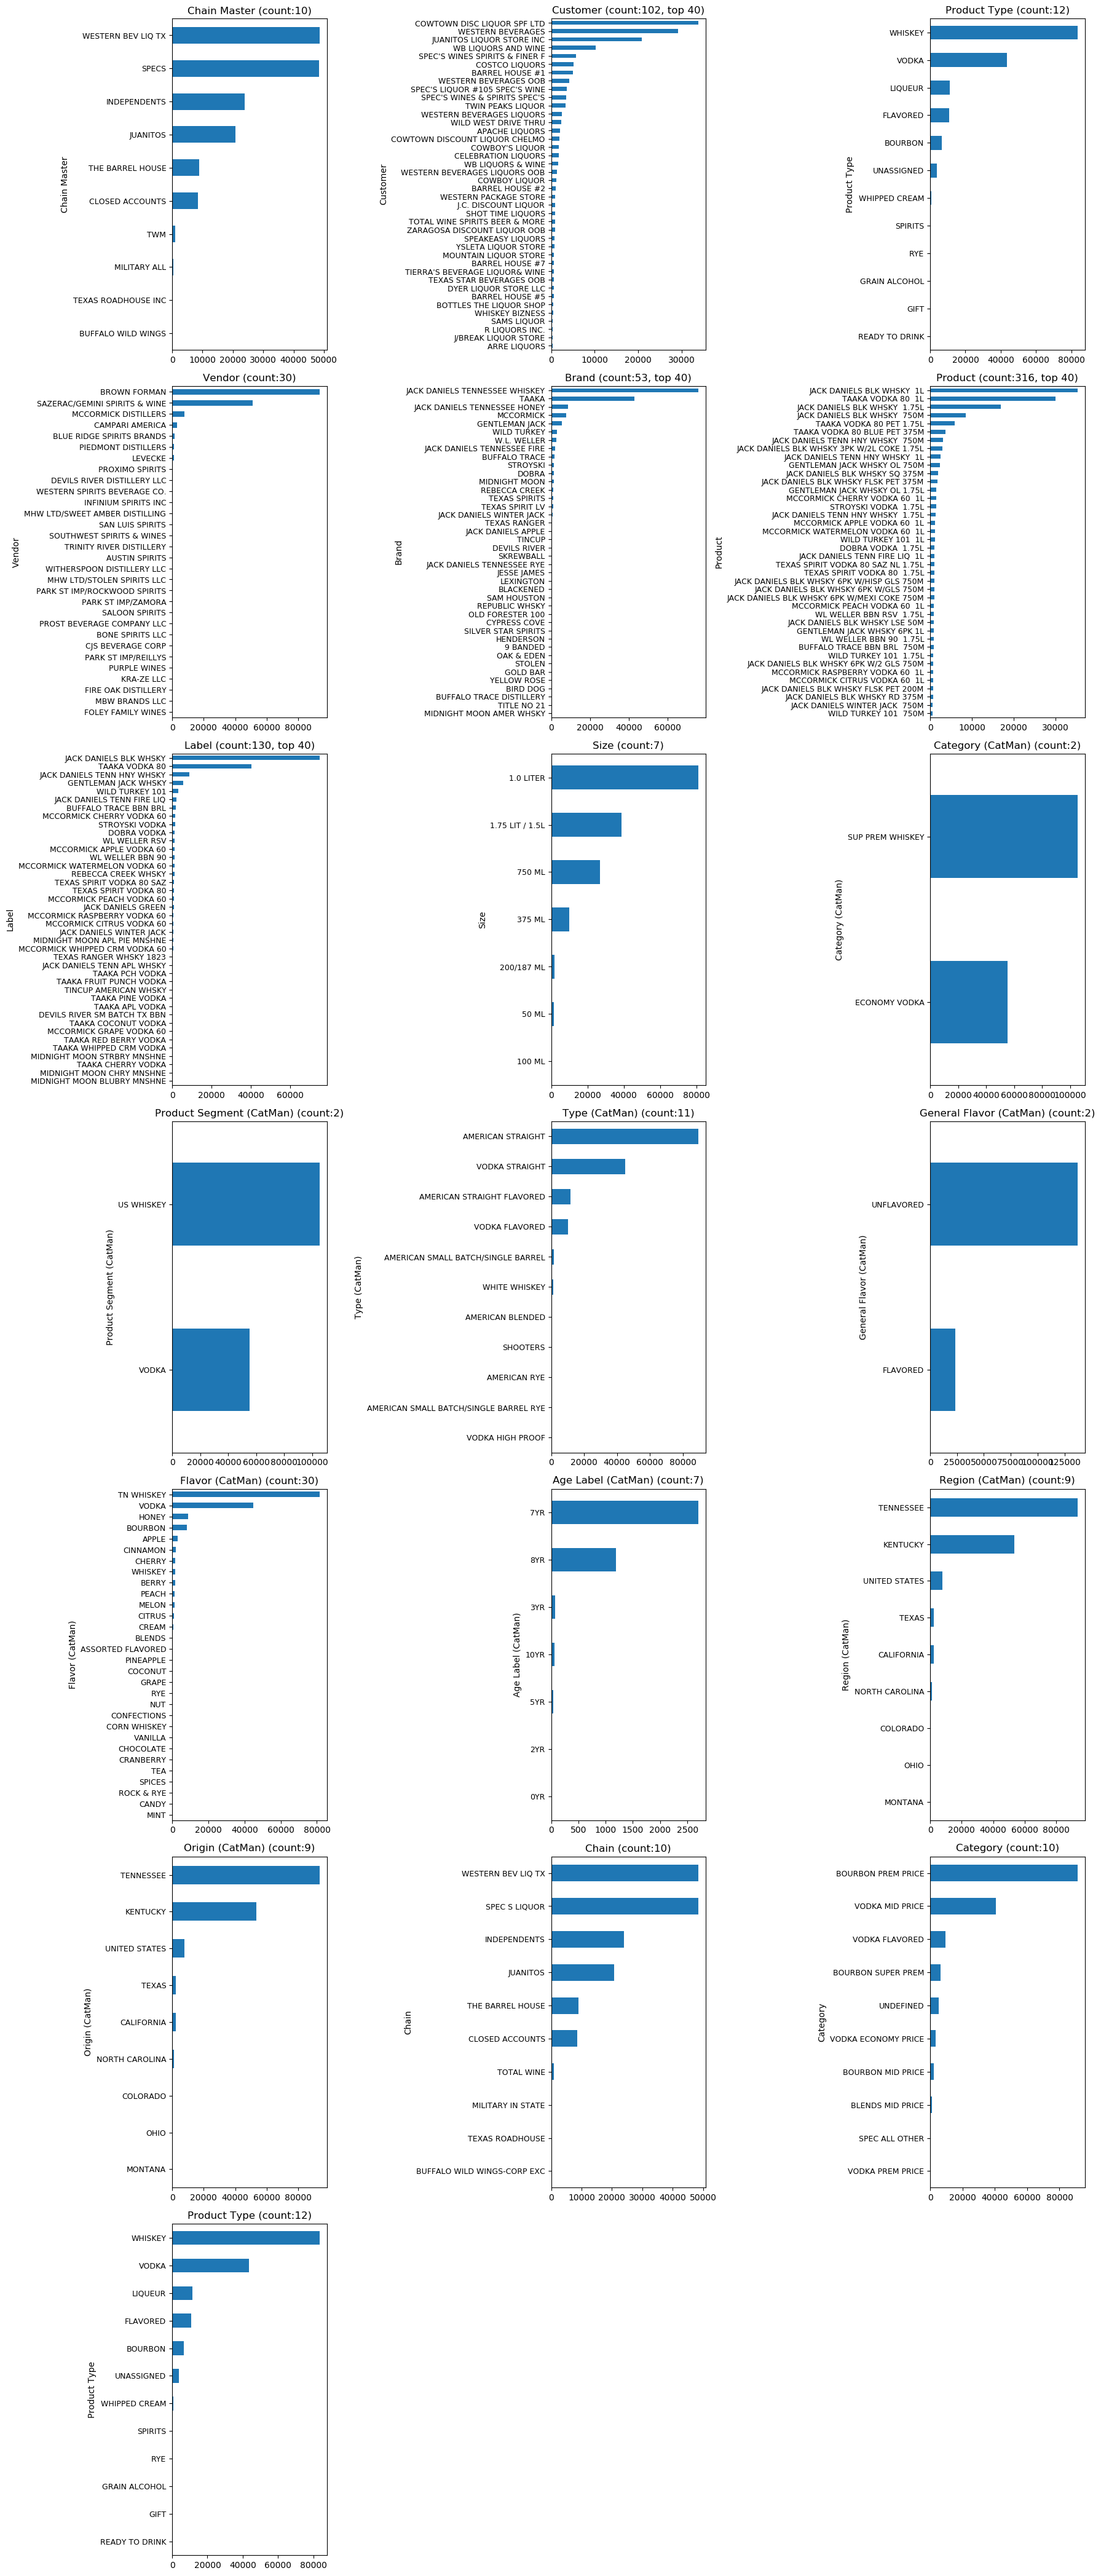

In [7]:
rows=math.ceil(len(cols)/3)
plt.figure(figsize=(18,6*rows))
maxOut = 40
for i,c in enumerate(cols):
    plt.subplot(rows,3,i+1)
    v =  data.groupby(c)['9L Cases'].sum().sort_values(ascending=True)
    plt.title(c + ' (count:' + str(v.shape[0]) + (', top ' + str(maxOut)  if v.shape[0]>maxOut else '' ) + ')')
    plt.tick_params(axis='y',labelsize=9)
    v.tail(maxOut).plot(kind='barh')
plt.tight_layout()

# Qualitative Distributions

## by Qualitative Column

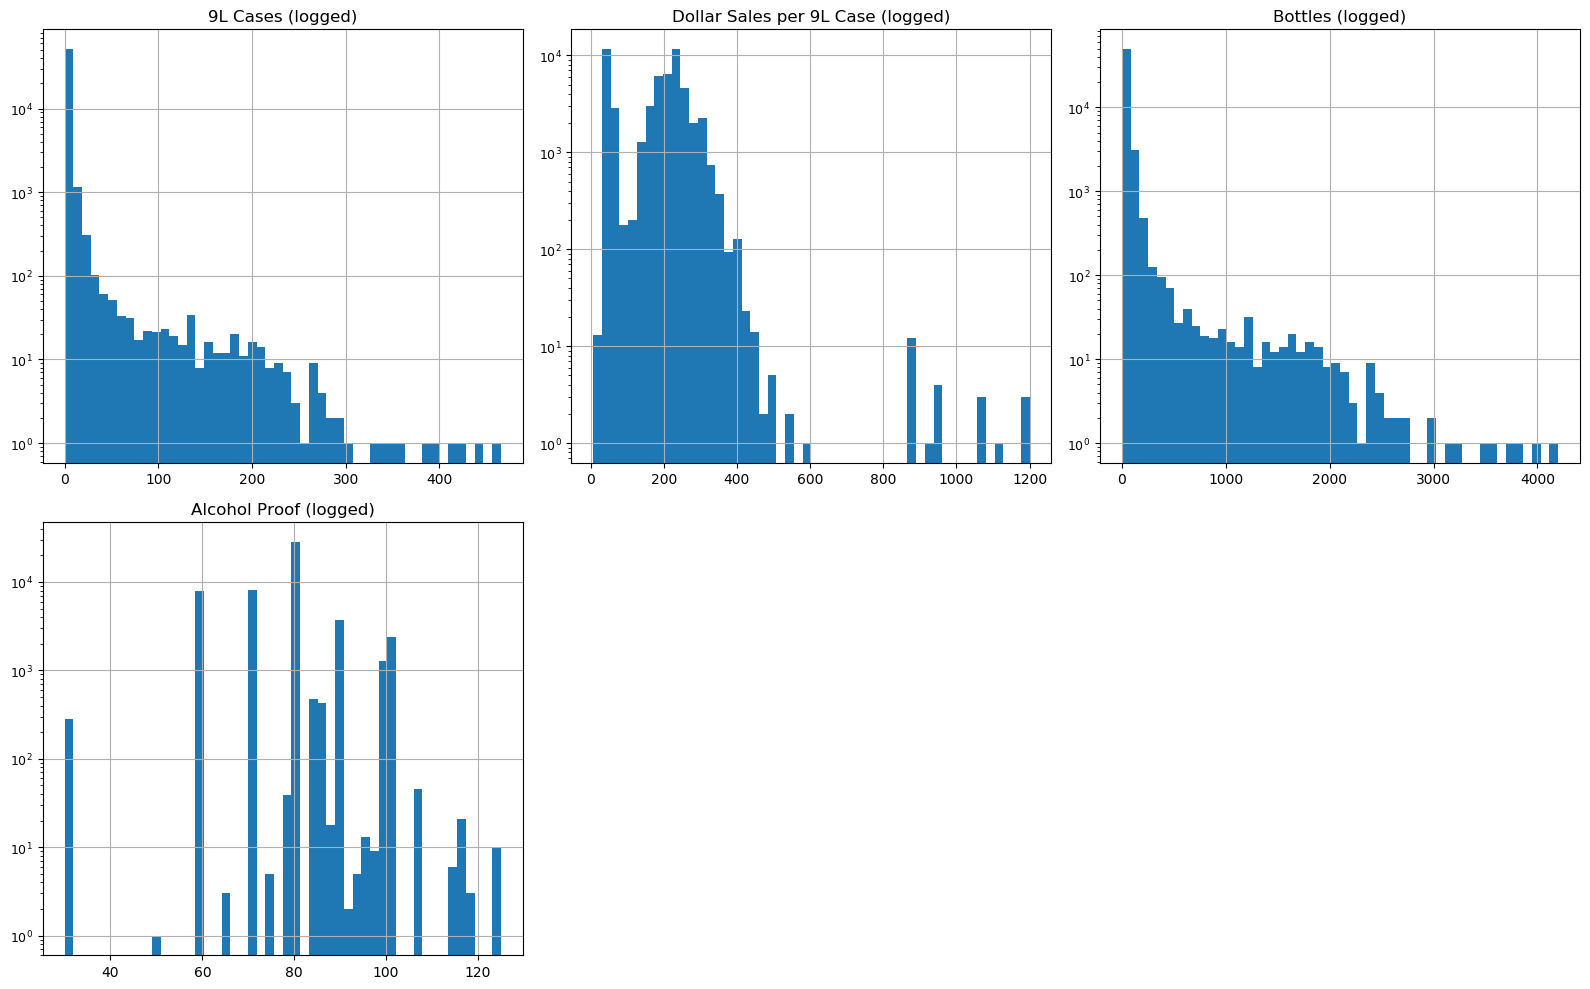

In [8]:
#cols = data.select_dtypes('object').columns
import seaborn as sns
cols = ['9L Cases','Dollar Sales per 9L Case','Bottles','Alcohol Proof']
rows = math.ceil(len(cols)/3)
plt.figure(figsize=(16,5*rows))
for i,c in enumerate(cols):
    plt.subplot(rows,3,i+1)
    plt.title(c + ' (logged)')
    plt.tick_params(axis='y',labelsize=9)
    data[data[c]!=-99999][c].hist(bins=50)
    #sns.distplot(data[c],bins=50,kde=False)
    plt.yscale(value='log')
    
plt.tight_layout()

## Trends by Month

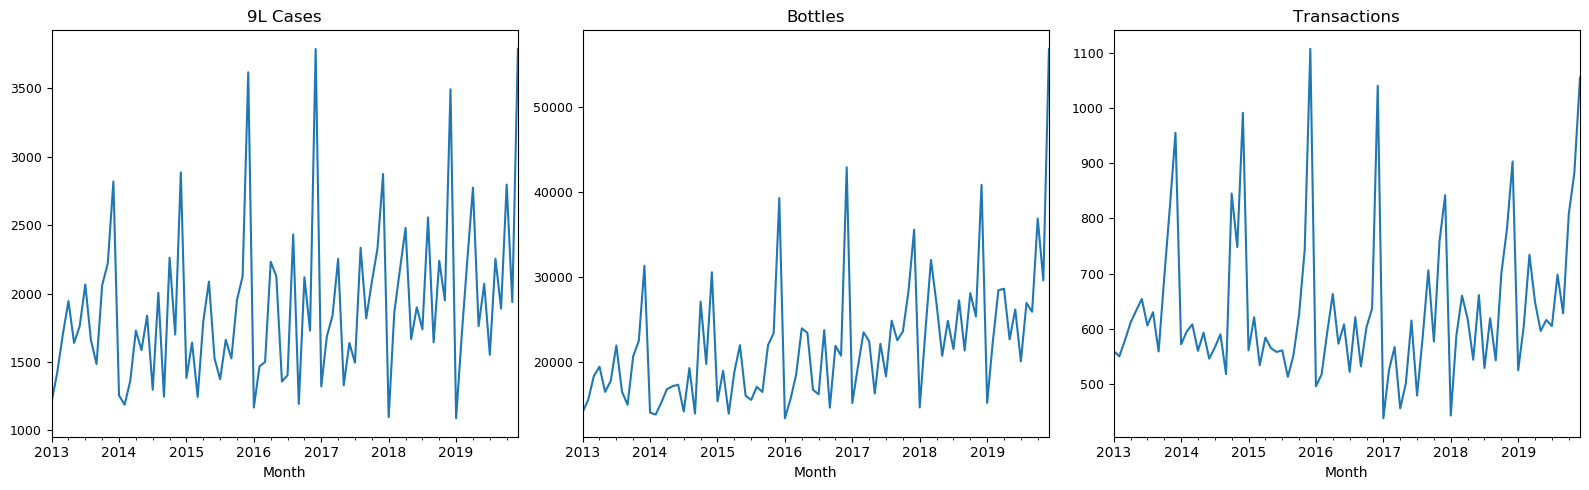

In [9]:
#cols = data.select_dtypes('object').columns
import seaborn as sns
cols = ['9L Cases','Bottles','Transactions']
rows = math.ceil(len(cols)/3)
plt.figure(figsize=(16,5*rows))
for i,c in enumerate(cols):
    plt.subplot(rows,3,i+1)
    plt.title(c)
    plt.tick_params(axis='y',labelsize=9)
    d=data.groupby(by='Month')[c].sum()
    d.plot()
plt.tight_layout()

## Counting Products by Month

50

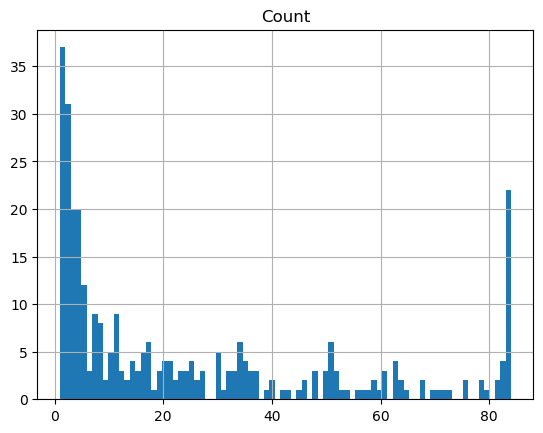

In [10]:
plt.style.use('default')
t=data.groupby(['Product'])['Month'].agg(Count='nunique').sort_values(by='Count',ascending=False)
t.hist(bins=84)
sum(t['Count']>=60)

## Counting Customers Chain and Products by Month

84

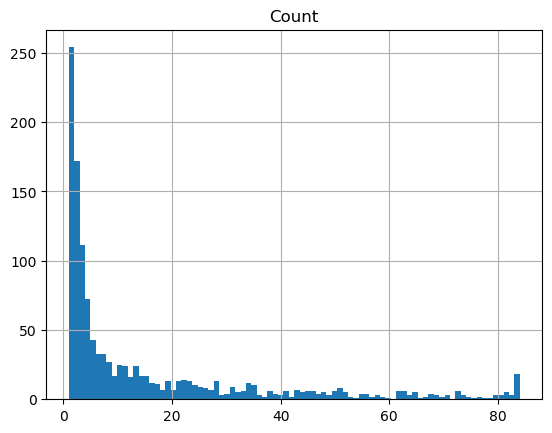

In [11]:
plt.style.use('default')
t=data.groupby(['Product','Chain Master'])['Month'].agg(Count='nunique').sort_values(by='Count',ascending=False)
t.hist(bins=84)
sum(t['Count']>=60)

# Price Analysis

## Distribution of Price Mean and Std per Product

<Figure size 1600x500 with 0 Axes>

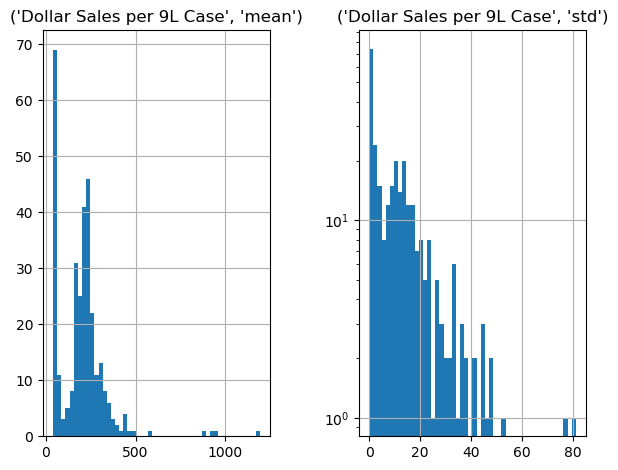

In [12]:

products = data.groupby('Product').agg({'Dollar Sales per 9L Case':[np.mean,np.std]})
plt.figure(figsize=(16,5))
products.hist(bins=50)
plt.yscale(value='log')
plt.tight_layout()           
           

## Price Mean and Variance by Month (Normalized)

### Top Customers

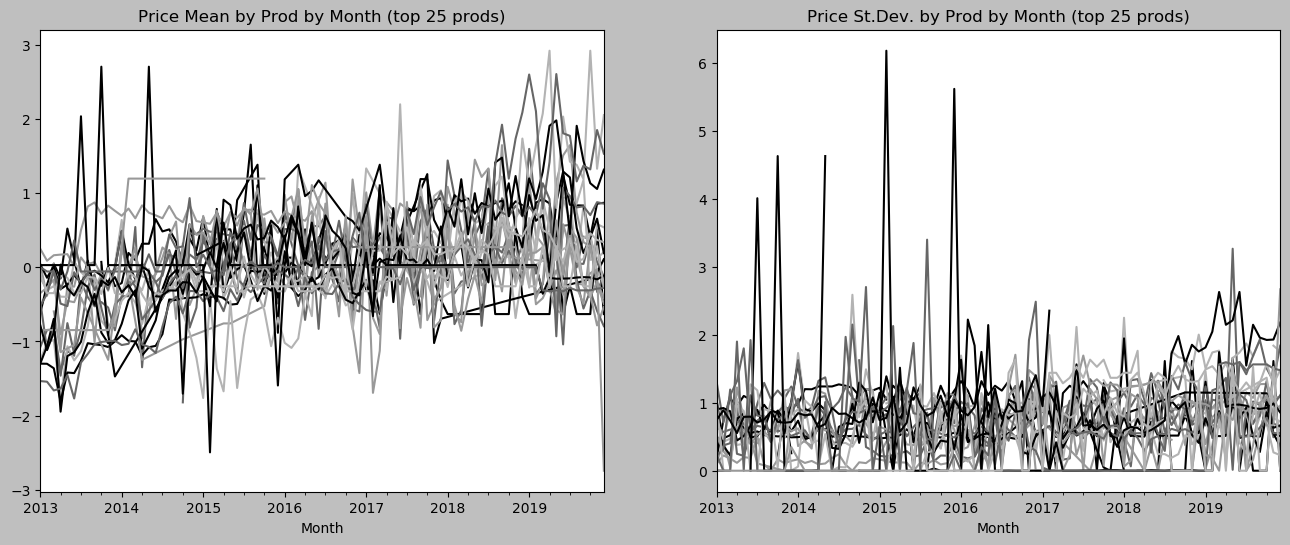

,Product,Month,Price9LMean,Price9LStd,ProductID
1454,TAAKA VODKA 80 BLUE PET 375M,2015-02-01,-2.494960,6.183617,854495
1464,TAAKA VODKA 80 BLUE PET 375M,2015-12-01,-1.593370,5.621756,854495
1445,TAAKA VODKA 80 BLUE PET 375M,2014-05-01,2.704207,4.632744,854495
1438,TAAKA VODKA 80 BLUE PET 375M,2013-10-01,2.704207,4.632744,854495
1435,TAAKA VODKA 80 BLUE PET 375M,2013-07-01,2.035528,4.012074,854495
...,...,...,...,...,...
1433,TAAKA VODKA 80 BLUE PET 375M,2013-05-01,0.029491,NaN,854495
1446,TAAKA VODKA 80 BLUE PET 375M,2014-06-01,0.029491,NaN,854495
1449,TAAKA VODKA 80 BLUE PET 375M,2014-09-01,0.029491,NaN,854495
1622,TEXAS SPIRIT VODKA 80 1.75L,2015-10-01,1.195491,NaN,854778


In [13]:
# center and scale price per each product
dataT = data[data['Dollar Sales per 9L Case'] > 0].copy()
dataT['Dollar Sales per 9L Case Norm'] = dataT.groupby(['Product'])['Dollar Sales per 9L Case'].transform(lambda x:(x - x.mean()) / x.std())

topNum=25
topProds = (dataT.groupby('Product')
            .agg(Tot9LCases= ('9L Cases',sum))
            .sort_values(by='Tot9LCases',ascending=False)
            .head(topNum)
           )

productsMonth=(dataT[dataT['Product'].isin(topProds.index.values)]
               .groupby(['Product','Month'])
               .agg(Price9LMean=('Dollar Sales per 9L Case Norm',np.mean)
                    ,Price9LStd=('Dollar Sales per 9L Case Norm',np.std)
                    ,ProductID = ('Product ID','first')
                   )
               .reset_index()
              )

plt.style.use('grayscale')
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
productsMonth.groupby('Product').plot.line(x='Month',y='Price9LMean',ax=ax1)
ax1.get_legend().remove()
ax1.set_title("Price Mean by Prod by Month (top " + str(topNum) + ' prods)')

productsMonth.groupby('Product').plot.line(x='Month',y='Price9LStd',ax=ax2)
ax2.get_legend().remove()
ax2.set_title("Price St.Dev. by Prod by Month (top " + str(topNum) + ' prods)')
plt.show()
plt.style.use('default')
#print(productsMonth.shape)
productsMonth.sort_values(by='Price9LStd',ascending=False)

### Bottom Customers

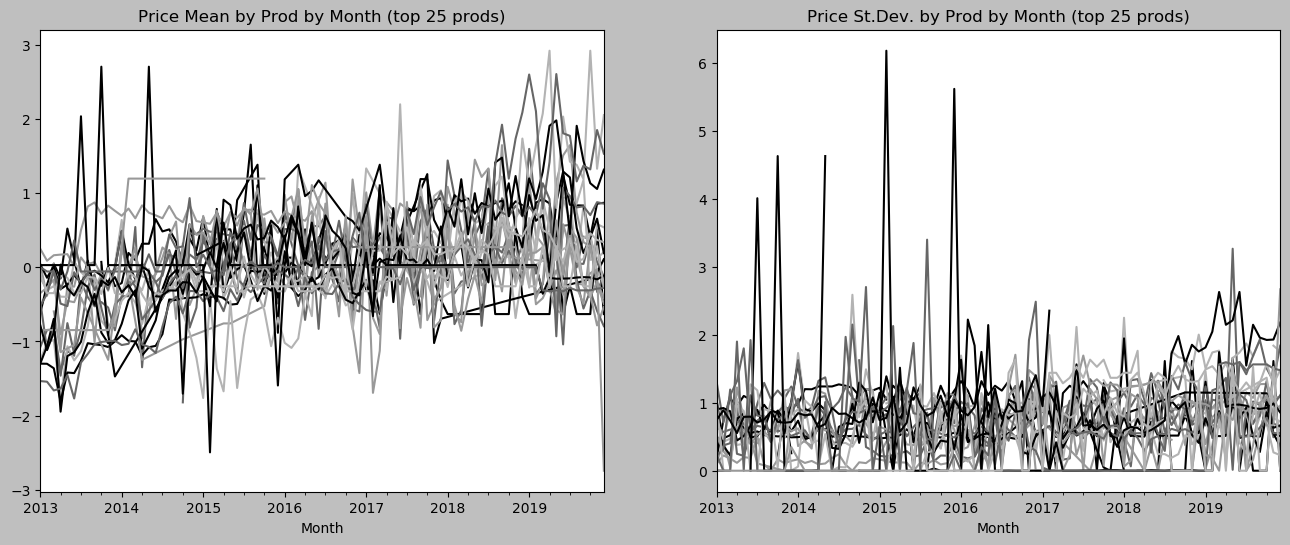

,Product,Month,Price9LMean,Price9LStd,ProductID
1454,TAAKA VODKA 80 BLUE PET 375M,2015-02-01,-2.494960,6.183617,854495
1464,TAAKA VODKA 80 BLUE PET 375M,2015-12-01,-1.593370,5.621756,854495
1445,TAAKA VODKA 80 BLUE PET 375M,2014-05-01,2.704207,4.632744,854495
1438,TAAKA VODKA 80 BLUE PET 375M,2013-10-01,2.704207,4.632744,854495
1435,TAAKA VODKA 80 BLUE PET 375M,2013-07-01,2.035528,4.012074,854495
...,...,...,...,...,...
1433,TAAKA VODKA 80 BLUE PET 375M,2013-05-01,0.029491,NaN,854495
1446,TAAKA VODKA 80 BLUE PET 375M,2014-06-01,0.029491,NaN,854495
1449,TAAKA VODKA 80 BLUE PET 375M,2014-09-01,0.029491,NaN,854495
1622,TEXAS SPIRIT VODKA 80 1.75L,2015-10-01,1.195491,NaN,854778


In [14]:
# center and scale price per each product
dataT = data[data['Dollar Sales per 9L Case'] > 0].copy()
dataT['Dollar Sales per 9L Case Norm'] = dataT.groupby(['Product'])['Dollar Sales per 9L Case'].transform(lambda x:(x - x.mean()) / x.std())

bottomNum=25
bottomProds = (dataT.groupby('Product')
            .agg(Tot9LCases= ('9L Cases',sum))
            .sort_values(by='Tot9LCases',ascending=False)
            .head(topNum)
           ) 

productsMonth=(dataT[dataT['Product'].isin(bottomProds.index.values)]
               .groupby(['Product','Month'])
               .agg(Price9LMean=('Dollar Sales per 9L Case Norm',np.mean)
                    ,Price9LStd=('Dollar Sales per 9L Case Norm',np.std)
                    ,ProductID = ('Product ID','first')
                   )
               .reset_index()
              )

plt.style.use('grayscale')
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
productsMonth.groupby('Product').plot.line(x='Month',y='Price9LMean',ax=ax1)
ax1.get_legend().remove()
ax1.set_title("Price Mean by Prod by Month (top " + str(topNum) + ' prods)')

productsMonth.groupby('Product').plot.line(x='Month',y='Price9LStd',ax=ax2)
ax2.get_legend().remove()
ax2.set_title("Price St.Dev. by Prod by Month (top " + str(topNum) + ' prods)')
plt.show()
#print(productsMonth.shape)
productsMonth.sort_values(by='Price9LStd',ascending=False)

## Price Mean and Variance by Month, Product and Customer (Normalized)

### Top Customers

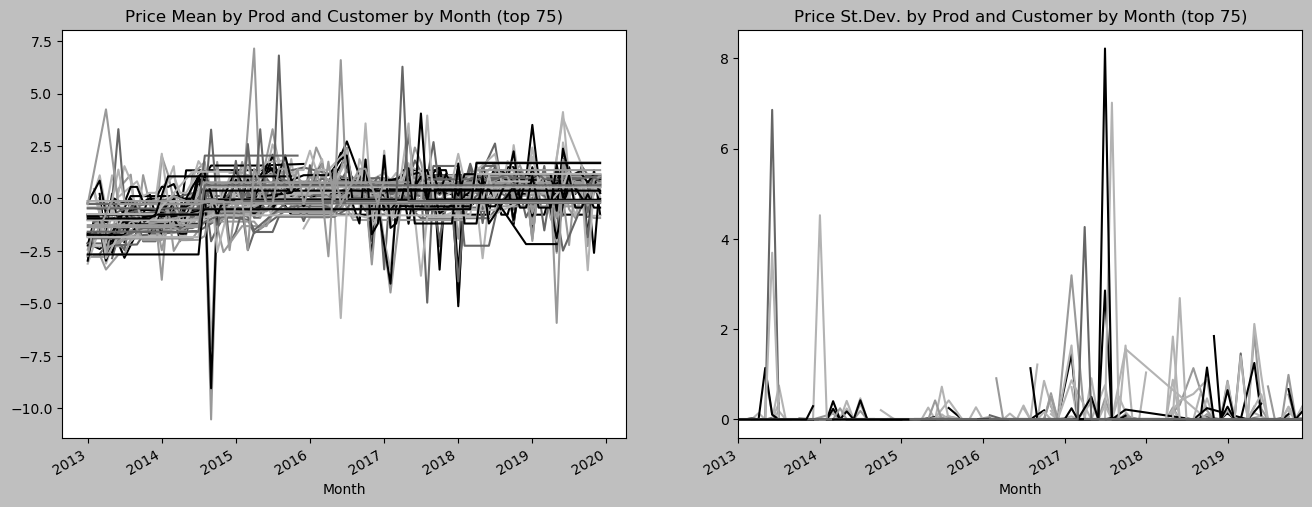

,ProductCustomer,Month,Price9LMean,Price9LStd,ProductID,CustomerID
3349,TAAKA VODKA 80 BLUE PET 375M-BARREL HOUSE #1,2015-04-01,7.142731,NaN,854495,300004001
3540,TAAKA VODKA 80 PET 1.75L-CELEBRATION LIQUORS,2015-08-01,6.810022,NaN,854280,500007616
3908,TAAKA VODKA 80 PET 1.75L-WILD WEST DRIVE THRU,2016-06-01,6.590523,NaN,854280,500034016
4019,TEXAS SPIRIT VODKA 80 SAZ NL 1.75L-WESTERN BEV...,2017-04-01,6.275366,4.262513,856724,300001417
3882,TAAKA VODKA 80 PET 1.75L-WILD WEST DRIVE THRU,2013-04-01,4.242538,NaN,854280,500034016
...,...,...,...,...,...,...
1280,JACK DANIELS BLK WHSKY 1L-SPEC'S WINES & SPIR...,2016-06-01,-5.696424,NaN,5413,300008556
2702,JACK DANIELS TENN HNY WHSKY 1L-WESTERN BEVERAGES,2019-05-01,-5.926702,NaN,5704,300001417
2008,JACK DANIELS BLK WHSKY 750M-WB LIQUORS AND WINE,2014-09-01,-7.157310,NaN,5414,300001811
2072,JACK DANIELS BLK WHSKY 750M-WESTERN BEVERAGES,2014-09-01,-9.041367,NaN,5414,300001411


In [15]:
# center and scale price per each product

dataT = data[data['Dollar Sales per 9L Case'] > 0].copy()
dataT['ProductCustomer'] = dataT['Product'] +'-' + dataT['Customer']
dataT['Dollar Sales per 9L Case Norm'] = dataT.groupby('ProductCustomer')['Dollar Sales per 9L Case'].transform(lambda x:(x - x.mean()) / x.std())

topNum=75
topProds = (dataT.groupby('ProductCustomer')
            .agg(Tot9LCases= ('9L Cases',sum))
            .sort_values(by='Tot9LCases',ascending=False)
            .head(topNum)
           )

productsMonth=(dataT[dataT['ProductCustomer'].isin(topProds.index.values)]
               .groupby(['ProductCustomer','Month'])
               .agg(Price9LMean=('Dollar Sales per 9L Case Norm',np.mean)
                    ,Price9LStd=('Dollar Sales per 9L Case Norm',np.std)
                    ,ProductID=('Product ID','first')
                    ,CustomerID=('Customer ID','first')
                   )               
               .reset_index()
               )

plt.style.use('grayscale')
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
productsMonth.groupby('ProductCustomer').plot.line(x='Month',y='Price9LMean',ax=ax1)
ax1.get_legend().remove()
ax1.set_title("Price Mean by Prod and Customer by Month (top " + str(topNum) + ')')

productsMonth.groupby('ProductCustomer').plot.line(x='Month',y='Price9LStd',ax=ax2)
ax2.get_legend().remove()
ax2.set_title("Price St.Dev. by Prod and Customer by Month (top " + str(topNum) + ')')
ax2.set_xlim( productsMonth['Month'].min(),productsMonth['Month'].max())
plt.show()
#print(productsMonth.shape)
productsMonth.sort_values(by='Price9LMean',ascending=False)


### Bottom Customers and Products

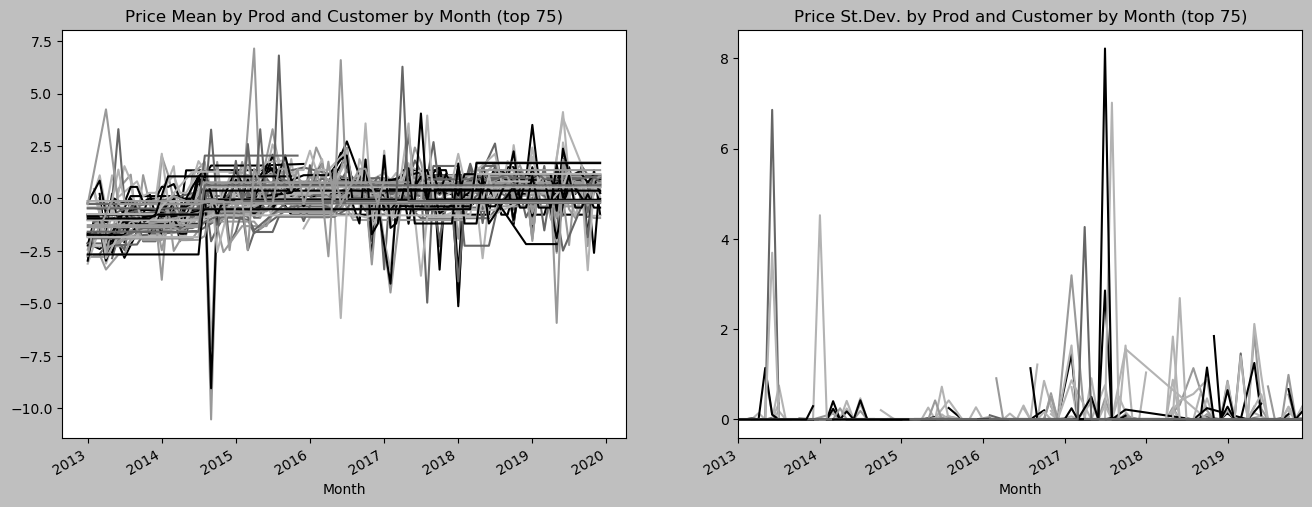

In [16]:
# center and scale price per each product
dataT = data[data['Dollar Sales per 9L Case'] > 0].copy()
dataT['ProductCustomer'] = dataT['Product'] +'-' + dataT['Customer']
dataT['Dollar Sales per 9L Case Norm'] = dataT.groupby('ProductCustomer')['Dollar Sales per 9L Case'].transform(lambda x:(x - x.mean()) / x.std())

topNum=75
bottomProds = (dataT.groupby('ProductCustomer')
            .agg(Tot9LCases= ('9L Cases',sum))
            .sort_values(by='Tot9LCases',ascending=False)
            .head(topNum)
           )

productsMonth=(dataT[dataT['ProductCustomer'].isin(bottomProds.index.values)]
               .groupby(['ProductCustomer','Month'])
               .agg(Price9LMean=('Dollar Sales per 9L Case Norm',np.mean)
                    ,Price9LStd=('Dollar Sales per 9L Case Norm',np.std)
                    ,ProductID=('Product ID','first')
                    ,CustomerID=('Customer ID','first')
                   )               
               .reset_index()
               )

plt.style.use('grayscale')
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
productsMonth.groupby('ProductCustomer').plot.line(x='Month',y='Price9LMean',ax=ax1)
ax1.get_legend().remove()
ax1.set_title("Price Mean by Prod and Customer by Month (top " + str(topNum) + ')')

productsMonth.groupby('ProductCustomer').plot.line(x='Month',y='Price9LStd',ax=ax2)
ax2.get_legend().remove()
ax2.set_title("Price St.Dev. by Prod and Customer by Month (top " + str(topNum) + ')')
ax2.set_xlim( productsMonth['Month'].min(),productsMonth['Month'].max())
plt.show()
#print(productsMonth.shape)
productsMonth.sort_values(by='Price9LMean',ascending=False)
plt.style.use('default')

## Contribution to the revenue

### By Product

Count of transaction per product vs thier contribution to the Revenue

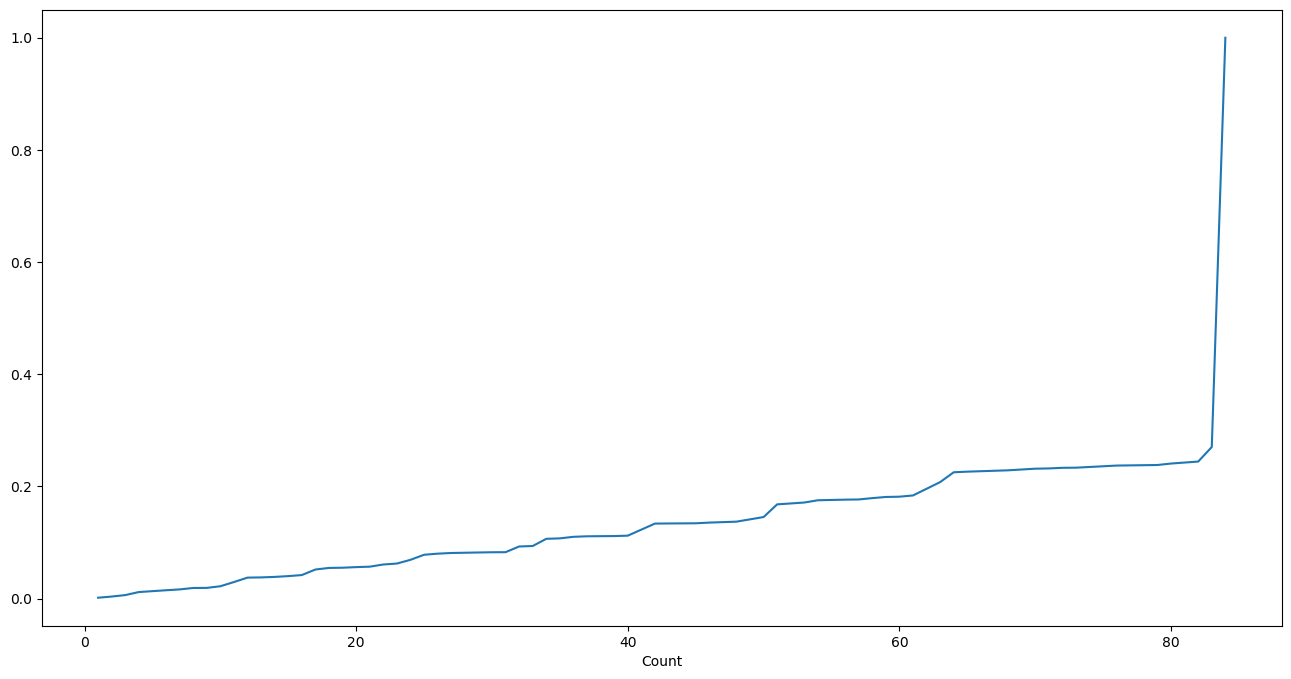

In [17]:
t=(data.groupby(['Product'])
   .agg(Count=('Month','nunique')
        ,DollarSales = ('Dollar Sales',np.sum)
       )
  )
t['ratioRevenue'] = t['DollarSales'] / sum(t['DollarSales'])
runningSalesByCount=t.groupby('Count')['DollarSales'].sum().cumsum()
runningSalesByCountPerc = runningSalesByCount / sum(t['DollarSales'])
plt.figure(figsize=(16,8))
runningSalesByCountPerc.plot()

### By Product  and Customer Chain

Count of transaction per product and Customer Chain vs thier contribution to the Revenue

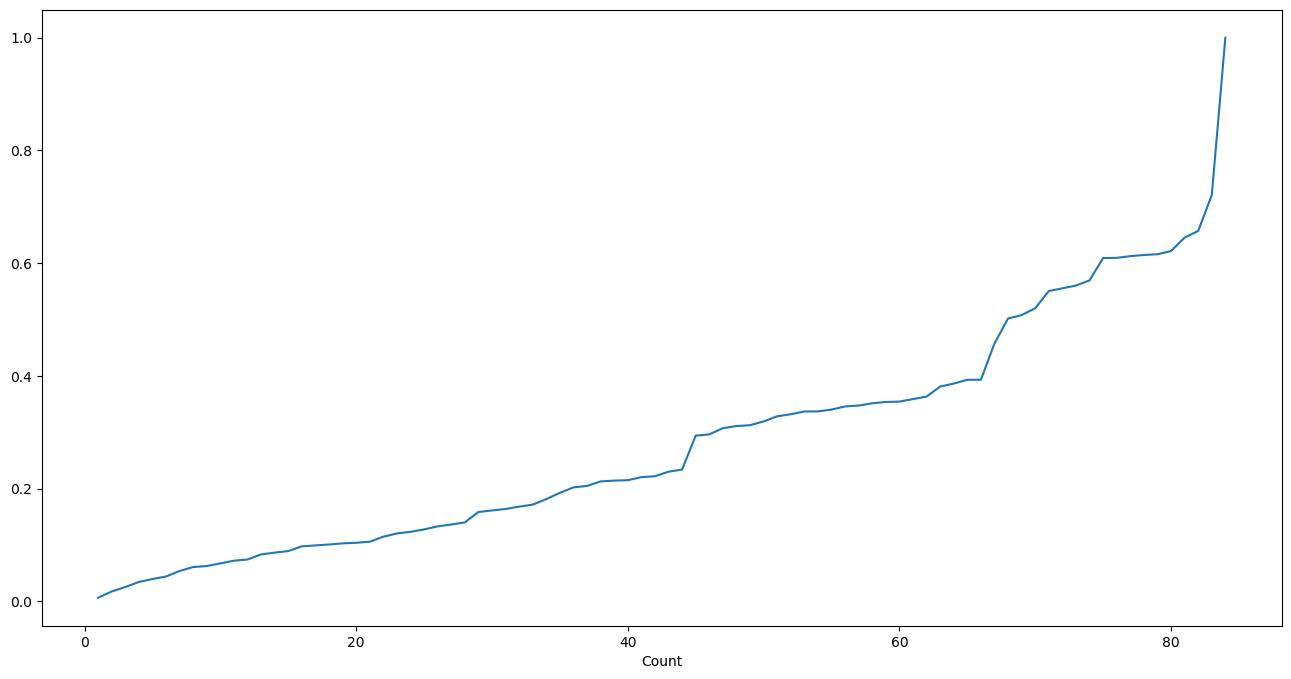

In [18]:
t=(data.groupby(['Product','Chain Master'])
   .agg(Count=('Month','nunique')
        ,DollarSales = ('Dollar Sales',np.sum)
       )
  )
t['ratioRevenue'] = t['DollarSales'] / sum(t['DollarSales'])
runningSalesByCount=t.groupby('Count')['DollarSales'].sum().cumsum()
runningSalesByCountPerc = runningSalesByCount / sum(t['DollarSales'])
plt.figure(figsize=(16,8))
runningSalesByCountPerc.plot()


# Price Elasticity

Calculated for Top Products per each Customer Chain

In [19]:
customers = data.groupby(['Chain Master'])['9L Cases'].agg(sum='sum').sort_values(by='sum',ascending=False)
products = data.groupby(['Product'])['9L Cases'].agg(sum='sum').sort_values(by='sum',ascending=False)
print(customers.head(5))
print(products.head(5))

                          sum
Chain Master                 
WESTERN BEV LIQ TX  48496.883
SPECS               48441.099
INDEPENDENTS        23945.687
JUANITOS            20824.889
THE BARREL HOUSE     8907.306
                                     sum
Product                                 
JACK DANIELS BLK WHSKY  1L     35247.820
TAAKA VODKA 80  1L             29986.305
JACK DANIELS BLK WHSKY  1.75L  16976.142
JACK DANIELS BLK WHSKY  750M    8484.580
TAAKA VODKA 80 PET 1.75L        5848.830


C:\Users\annam\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\annam\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\annam\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


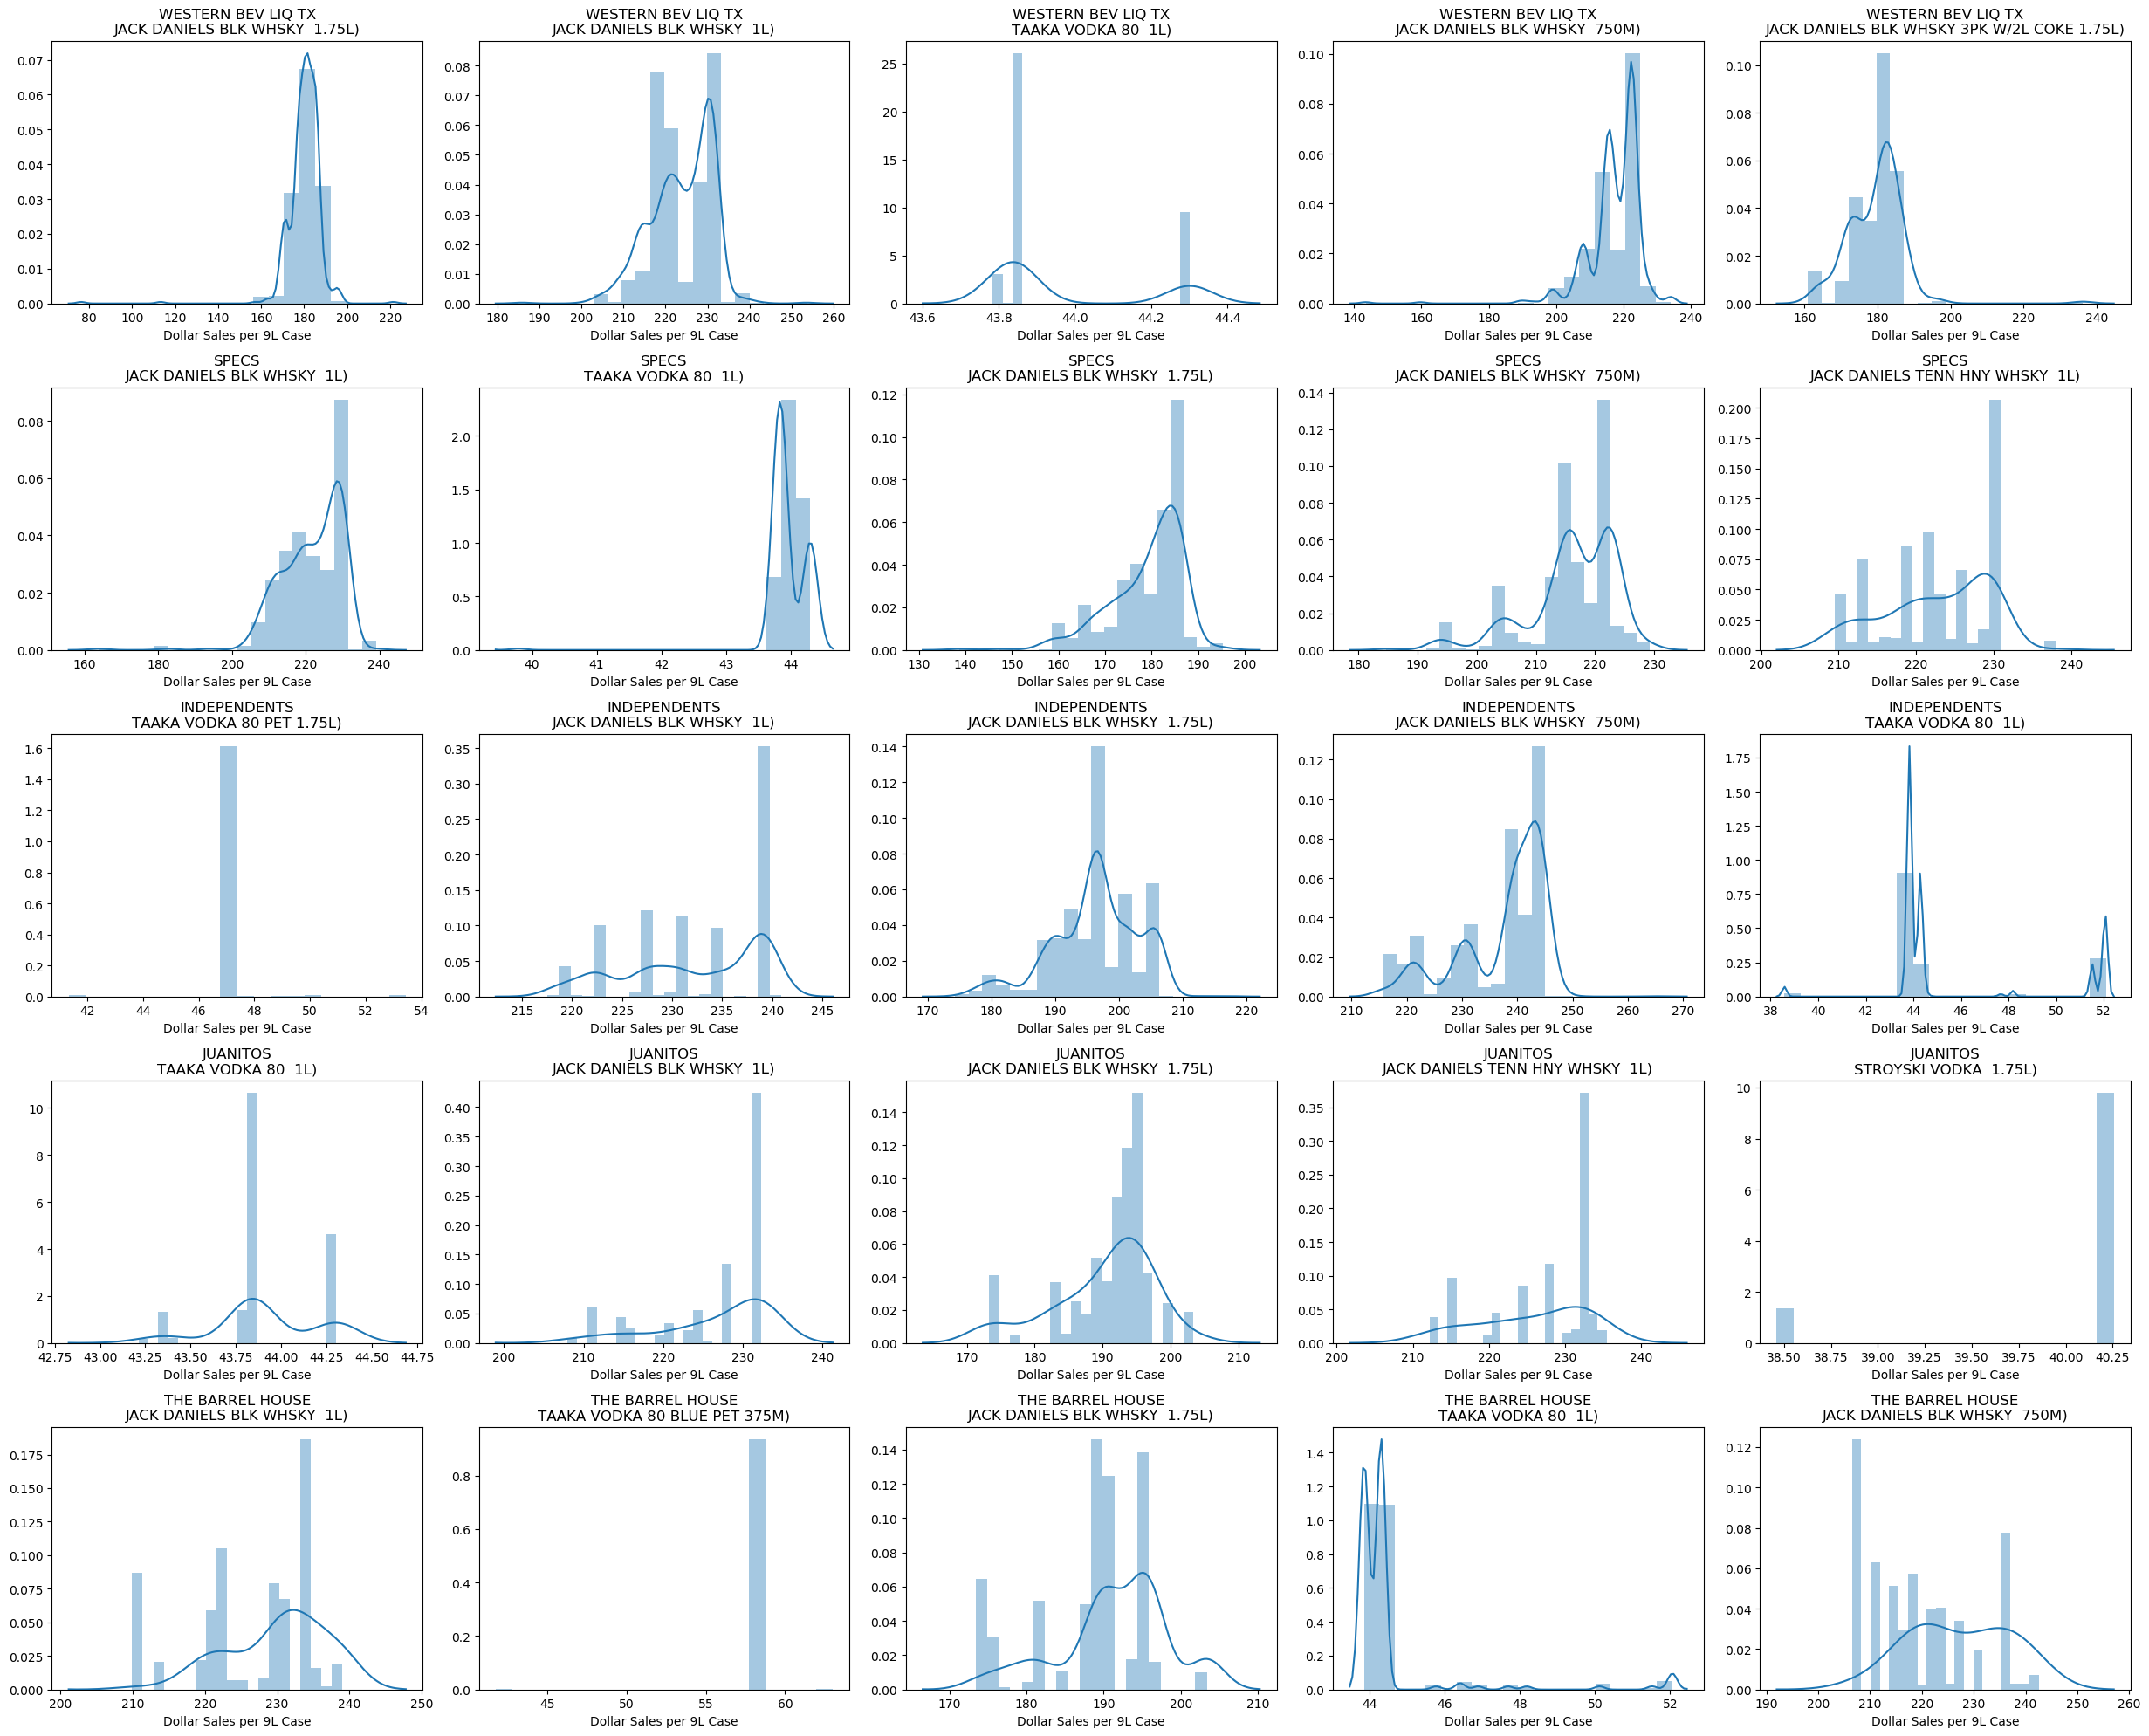

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
cs = 5
ps = 5
cust=customers.index[0:cs]
#prod=products.index[0:ps]
fig, axs = plt.subplots(cs,ps,figsize=(5*cs,ps*4))
for ic,c in enumerate(cust):
    CustProducts = data[data['Chain Master']==c].groupby(['Product'])['9L Cases'].agg(sum='sum').sort_values(by='sum',ascending=False).index[0:ps]
    for ip,p in enumerate(CustProducts):
        t=data[(data['Chain Master']==c)  &  (data['Product']==p)]
        sns.distplot(t['Dollar Sales per 9L Case'], hist_kws={'weights':t['Dollar Sales']},bins=20,ax=axs[ic,ip]).set_title(c + "\n" + p+')')
        #sns.distplot(t['Dollar Sales per 9L Case'], hist_kws={'weights':t['9L Cases']},bins=20,ax=axs[ic,ip],color='green',hist=False)
plt.tight_layout()


# Columns selected
MAIN TABLE
---------
Aggregated at Weekly Base

- Date (Year/Week)
- Chain Master
- Customer
- Customer ID
- Product Type
- Brand
- Product
- Product ID
- Label
- Size
- Category (CatMan)
- Type (CatMan)
- General Flavor (CatMan)
- Age Label (CatMan)
- Import or Domestic (CatMan)
- Country (CatMan)
- Region (CatMan)
- Chain
- Category
- Product Type
- Alcohol Proof
- STD. Cases
- Dollar Sales
- 9L Cases
- Dollar Sales per Case
- Dollar Sales per 9L Case

PRICES TABLE
-------------
- List of prices by product (including tiering you have)
- historical by week

FILTERS
-------
- **Time filter** = 2010 - 2019
- **Region** = EL PASO
- **Category (CatMan)** = 'SUP PREM WHISKEY','ECONOMY VODKA'
